# Credti Card fraud detection

Data science task: Imbalanced binary classification using cost-sensitive learning

## 0. Extracting dataset from Kaggle

In [3]:
import kaggle

In [5]:
def extract_kaggle_dataset(url_kaggle):
    """ Connect with given kaggle url to download all available files.
    Arg:
        url_kaggle (string): kaggle url from any repository you want to download files.
    """
    # This extract all files from a given kaggle url
    kaggle.api.dataset_download_files(url_kaggle, quiet=False, unzip=True)

In [6]:
extract_kaggle_dataset('mlg-ulb/creditcardfraud')

100%|██████████| 66.0M/66.0M [00:16<00:00, 4.25MB/s]


## 1. Loading from local directory

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load credit card fraud data
fraud = pd.read_csv('creditcard.csv')

## 2. Exploratory Data Analysis

In [3]:
# Look to the data
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
# Credit card fraud PCA components descriptive stats
fraud.drop(columns=['Time','Amount']).describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [39]:
# Credit card fraud time and amount fearure descriptive stats
fraud[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [3]:
# credit card fraud dataset dimension
fraud.shape

(284807, 31)

In [5]:
# Transaction type counts
fraud['Class'].value_counts().rename(index={0:'True', 1:'Fradulent'})

True         284315
Fradulent       492
Name: Class, dtype: int64

It's is highly imbalanced

Text(0.5, 0, 'Type of transaction')

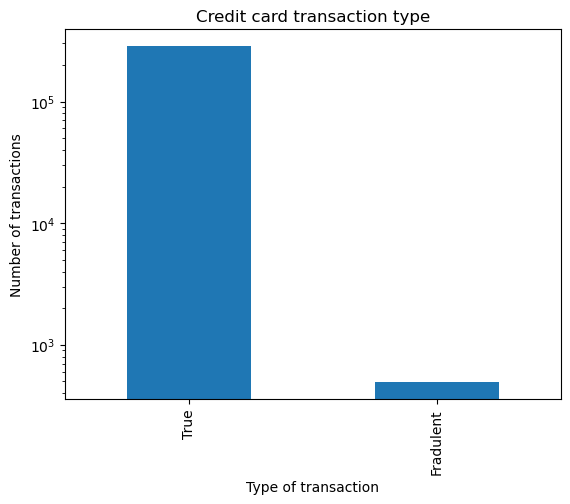

In [7]:
# Transaction type counts bar plot
fraud['Class'].value_counts().rename(index={0:'True', 1:'Fradulent'}).plot.bar(logy=True)
plt.title('Credit card transaction type')
plt.ylabel('Number of transactions (log(counts))')
plt.xlabel('Type of transaction')
plt.show()

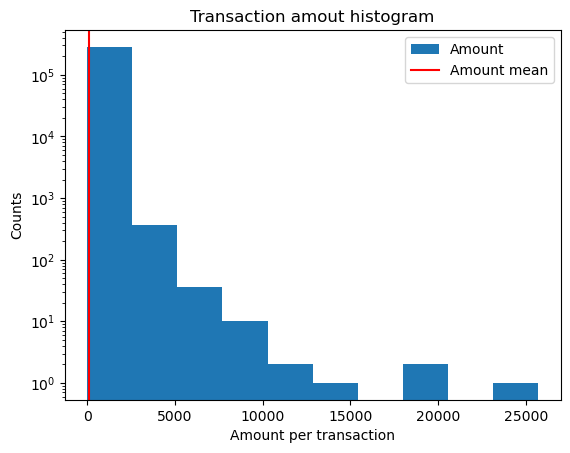

In [25]:
# Transaction amount histogram plot
fraud['Amount'].plot.hist(logy=True)
plt.axvline(x=fraud['Amount'].mean(), color = 'r', label = 'Amount mean')
plt.title('Transaction amount histogram')
plt.xlabel('Amount per transaction')
plt.ylabel('log(Counts)')
plt.legend()
plt.show()

<Axes: >

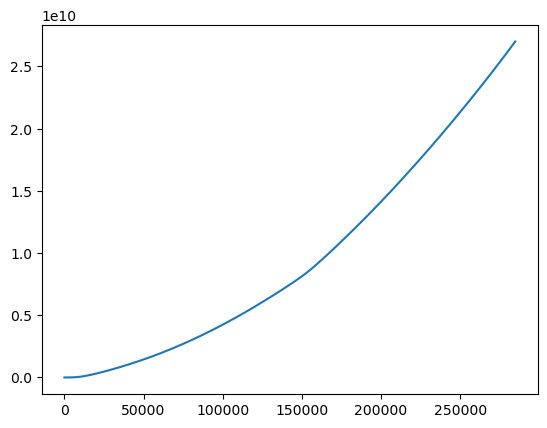

In [27]:
fraud['Time'].cumsum().plot()

### 2.2. Pllotting dataset using PCA components

There are 2 feature selection types. one using the component with the hightest explained variance and using the componet with the hightest eigenvalue per component.

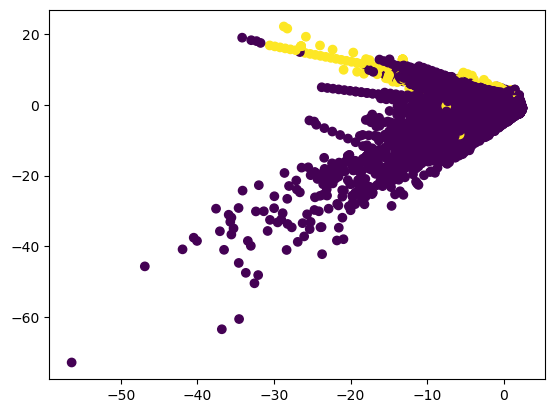

In [33]:
plt.scatter(x=fraud['V1'],y=fraud['V2'], c=fraud['Class'])
plt.show()

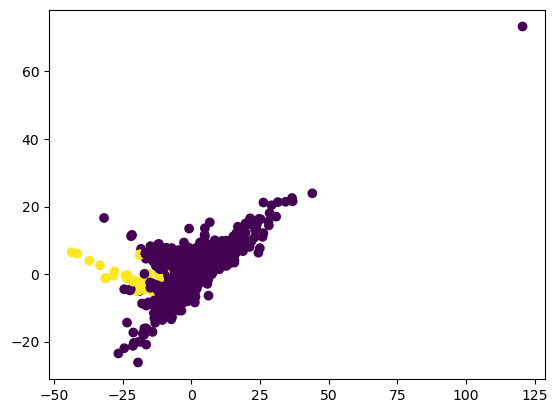

In [35]:
plt.scatter(x=fraud['V7'],y=fraud['V6'], c=fraud['Class'])
plt.show()

### 2.3. Correlation between features and labels

It's use Point Biserial correlation to calculate correlation between continuos and binary variable. There's significate staIf p-value is less than 0.05

In [7]:
from scipy import stats

In [13]:
for c in fraud.drop(columns=['Time','Amount','Class']).columns:
    print(c, stats.pointbiserialr(fraud['Class'], fraud[c]))

V1 SignificanceResult(statistic=-0.10134729859508607, pvalue=0.0)
V2 SignificanceResult(statistic=0.09128865034462016, pvalue=0.0)
V3 SignificanceResult(statistic=-0.19296082706741524, pvalue=0.0)
V4 SignificanceResult(statistic=0.13344748623900582, pvalue=0.0)
V5 SignificanceResult(statistic=-0.09497429899144924, pvalue=0.0)
V6 SignificanceResult(statistic=-0.04364316069996427, pvalue=4.213111345325936e-120)
V7 SignificanceResult(statistic=-0.1872565915142998, pvalue=0.0)
V8 SignificanceResult(statistic=0.01987512391479456, pvalue=2.7406731012506354e-26)
V9 SignificanceResult(statistic=-0.09773268607407982, pvalue=0.0)
V10 SignificanceResult(statistic=-0.21688294364102964, pvalue=0.0)
V11 SignificanceResult(statistic=0.154875644743949, pvalue=0.0)
V12 SignificanceResult(statistic=-0.2605929248772197, pvalue=0.0)
V13 SignificanceResult(statistic=-0.004569778799461305, pvalue=0.014737338961000997)
V14 SignificanceResult(statistic=-0.3025436958044071, pvalue=0.0)
V15 SignificanceResult(s

In [14]:
stats.pointbiserialr(fraud['Class'], fraud['Time'])

SignificanceResult(statistic=-0.012322570929245751, pvalue=4.818268891796334e-11)

In [15]:
stats.pointbiserialr(fraud['Class'], fraud['Amount'])

SignificanceResult(statistic=0.0056317530067686, pvalue=0.002651220649191581)

Since the p-value of this correlation is not less than .05, this correlation is not statistically significant. 

Higher coefficients denote a stronger magnitude of relationship between variables. Smaller coefficients denote weaker relationships. 

Components 22, 23 and 25 has not significant correlation. Components 1 3 4 7 10 11 12 14 16 17 18 has > 10 coefficients with the strongest magnitud of relationship with labels 

### 2.3. Correlation between PCA features 

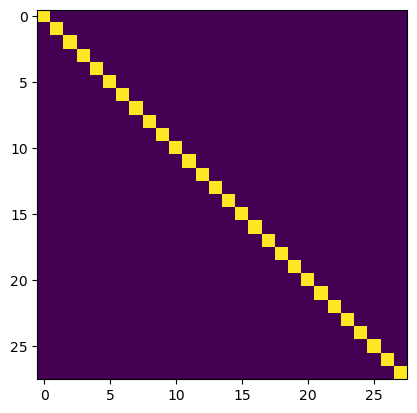

In [5]:
plt.imshow(fraud.drop(columns=['Class','Time','Amount']).corr())

It is expected to have correlation coefficients near to 0 because PCA components are linearlly independent.

In [5]:
fraud[['Time','Amount']].corr()

,Time,Amount
Time,1.000000,-0.010596
Amount,-0.010596,1.000000


## 3. Imbalanced classification with linearSVM

I'm going to run classification using just PCA components as input feature with and without cost-sensitive learning to compare results. I'll expect that hyperparameter tunning and crossvalidation optimal k-fold change.

In [13]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

## 3.1. Imbalanced PCA components only.

In [14]:
# A numpy random state object to create random state instances at each use
rng = np.random.RandomState(0)

# Dividing dataset in input features and labels
y = fraud['Class']
X = fraud.drop(columns=['Time','Amount','Class'])

# Spliting data into train/test  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

### 3.1.1. Inspecting effect of SVM's C parameter and l-norm (regularization) on imbalanced learning.


I would like to see how C parameter and l-norm (C and L-norm pair candidates) behaves performing binary classification on this imbalanced dataset. For doing so, I'll run the following experiments

1) I'll run a 3-fold crossvalidation grid search routine over 18 pairs candidates to find the 3 best pair candidates on the same crossvalidated partitions.
2) I'll run a 3-fold repeted stratified crossvalidation grid search routine to get 90 samples for each pair canditates.
3) I'll run a multi hypothesis test to find if there's statistical differences between the 3 pair candidates using frequentist and bayensian approach.
4) If there's no differences across the 3 best pair candidates, I'll pick the pair candidate with the lowest fitting time.

The metrics to compare performance will be F1 score and also, I want to inspect the Precision/Recall pair to see if the model have the ability to find all positive samples and it is capable of no classifying a positive sample as negative. 

I'll use the same metodology on cost-sensitive learning

In [15]:
# Grid search hyperparameter tunnig routine for 1)

# Parameters to search
parameters = {'penalty':('l1', 'l2'), 
              'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]
             }

# Creating estimator instance

lsvc = LinearSVC(dual=False, random_state=rng)

# Creating grid search instance
search = GridSearchCV(estimator=lsvc, param_grid=parameters, scoring="f1", cv=3, verbose=0)

# Fitting grid search instance
search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LinearSVC(dual=False,
                                 random_state=RandomState(MT19937) at 0x7FE568492F40),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100],
                         'penalty': ('l1', 'l2')},
             scoring='f1')

In [16]:
# Storing 1st resutls in a data frame
results = pd.DataFrame(data=search.cv_results_)
results.to_pickle('/home/gustavo/Documents/credit_card/first_experiment_results.pkl')

In [17]:
# Checkpoint to load 1st experiment results dataframe
results = pd.read_pickle('/home/gustavo/Documents/credit_card/first_experiment_results.pkl')

In [18]:
# Visalizing 3 best pair candidates. In fact, 4
results[(results['rank_test_score'] == 1) | (results['rank_test_score'] == 2) | (results['rank_test_score'] == 3)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,7.202665,2.163170,0.021306,0.001134,0.05,l1,"{'C': 0.05, 'penalty': 'l1'}",0.666667,0.772727,0.663265,0.700886,0.050818,2
7,0.640807,0.056735,0.023563,0.004272,0.05,l2,"{'C': 0.05, 'penalty': 'l2'}",0.679803,0.755760,0.663265,0.699610,0.040275,3
8,7.546346,0.750423,0.020613,0.000284,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.679803,0.761468,0.663265,0.701512,0.042929,1
9,0.635698,0.073850,0.024466,0.003920,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.679803,0.755760,0.663265,0.699610,0.040275,3


In [19]:
# I extract the best pair candidates parameters
parameters_to_test = results.loc[(results['rank_test_score'] == 1) | (results['rank_test_score'] == 2) | (results['rank_test_score'] == 3), 'params']
parameters_to_test

6    {'C': 0.05, 'penalty': 'l1'}
7    {'C': 0.05, 'penalty': 'l2'}
8     {'C': 0.1, 'penalty': 'l1'}
9     {'C': 0.1, 'penalty': 'l2'}
Name: params, dtype: object

In [20]:
# Grid search hyperparameter tunnig routine for 2.

parameters_to_test = {'penalty':('l1', 'l2'),
                      'C':[0.05, 0.1]
                     }

# estimator of choice
lsvc = LinearSVC(dual=False, random_state=rng)

# crossvalidation routine initialization
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=30, random_state=0)

# grid search routine initialization
search = GridSearchCV(estimator=lsvc, param_grid=parameters_to_test, scoring="f1", cv=cv, verbose=0, n_jobs=-1)

# grid search fitting
search.fit(X_train, y_train)

/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=30, n_splits=3, random_state=0),
             estimator=LinearSVC(dual=False,
                                 random_state=RandomState(MT19937) at 0x7FE568492F40),
             n_jobs=-1, param_grid={'C': [0.05, 0.1], 'penalty': ('l1', 'l2')},
             scoring='f1')

In [21]:
# Storing 2nd resutls in a data frame
results = pd.DataFrame(data=search.cv_results_)
results.to_pickle('/home/gustavo/Documents/credit_card/second_experiment_results.pkl')

In [22]:
# Checkpoint to load 2nd experiment results dataframe
results = pd.read_pickle('/home/gustavo/Documents/credit_card/second_experiment_results.pkl')

In [23]:
# Visalizing 3 best pair candidates. In fact, 4. Name the 4 estimator
results = results.sort_values(by=["rank_test_score"])
results = results.set_index(results["params"].apply(lambda x: "_".join(str(val) for val in x.values())))

In [27]:
from multiple_comparison import multiple_model_comparison

In [28]:
# Performing multi hypothesis test on 4 estimators results
multiple_model_comparison(df_results=results,
                          kfold=3, 
                          number_of_training_samples=X_train.shape[0], 
                          rope_interval=[-0.01, 0.01])

,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,0.1_l2,0.05_l2,0.485,1,0.000,0.002,0.998
1,0.1_l2,0.1_l1,0.533,1,0.010,0.100,0.890
2,0.1_l2,0.05_l1,0.474,1,0.045,0.224,0.731
3,0.05_l2,0.1_l1,0.317,1,0.009,0.039,0.952
4,0.05_l2,0.05_l1,0.338,1,0.043,0.147,0.810
5,0.1_l1,0.05_l1,0.173,1,0.021,0.044,0.935


There's no statistical diferences among all four estimators. Threfore, the {'C': 0.05, 'penalty': 'l2'} model is chosen with the lowest fitting time. p-values > 0.05. The rope probability indicates how probable a model is equal to another. All probabilities are high then; all models have a high degree of similarity. Worse and better probabilities indicates pairwise if a estimator is worse or better than the other.In this case, the porbabilities are low then, no model is worse or better than the other.

3.3. Validation linear SVM best paramets on test data

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [30]:
lsvc = LinearSVC(C=0.05, penalty='l2', dual=False, random_state=rng).fit(X_train, y_train)
predictions = lsvc.predict(X_test)

In [32]:
tuples = list(zip(*[['Imbalanced']*4,['precision', 'recall', 'f1-score', 'support']]))
index = pd.MultiIndex.from_tuples(tuples)
results_imbalanced = pd.DataFrame(classification_report(y_test, predictions, target_names=['True','Fraud'], output_dict=True))
results_imbalanced = results_imbalanced.set_index(index)
results_imbalanced = results_imbalanced.transpose()
results_imbalanced

Imbalanced                                  
              precision    recall  f1-score       support
True           0.999367  0.999859  0.999613  71082.000000
Fraud          0.882353  0.625000  0.731707    120.000000
accuracy       0.999228  0.999228  0.999228      0.999228
macro avg      0.940860  0.812430  0.865660  71202.000000
weighted avg   0.999170  0.999228  0.999162  71202.000000

### 3.1.2. Cost-sensitive learning on imbalanced dataset

I'll make the same experiements as before but, I uses the best C l-norm parameters from 1st part

1) I'll run 3-fold crossvalidation grid search routine over 24 class weigth combinations to find the 3 best class weights combiantions on the same crossvalidated partitions.
2) I'll run a 3-fold repeted stratified crossvalidation grid search routine to get 90 samples for each the 3 best class weights combiantions.
3) I'll run a multi hypothesis test to find if there's statistical differences between the 3 best class weights combiantions using frequentist and bayensian approach.
4) If there's no differences across the 3 best class weights combiantions, I'll pick the class weights combiantion with the lowest fitting time.

I use F1 score as performance metric and precision and recall to get insights about the estimator capacity to find miniority class samples.


In [33]:
import itertools

In [34]:
# I define the class_weight parameters to test 
class_weights_params = {0:[0.1,0.5,0.9,1], 1:[1,5,10,15,50,100]}

# I transform a dictionary into a list of dictionaries with an unique pair of weigth for majority and miniority class 
keys, values = zip(*class_weights_params.items())
class_weights_params = [dict(zip(keys, v)) for v in itertools.product(*values)]

In [36]:
# Grid search hyperparameter tunnig routine for 1.

parameters = {'class_weight':class_weights_params}

# Creating estimator instance
lsvc = LinearSVC(C=0.05, 
                 penalty='l2', 
                 dual=False, 
                 random_state=rng)

# Creating grid search instance
search = GridSearchCV(estimator=lsvc, 
                      param_grid=parameters, 
                      scoring=('f1','recall','precision'), 
                      refit='f1', 
                      cv=3, 
                      verbose=0)

# Fitting grid search instance
search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LinearSVC(C=0.05, dual=False,
                                 random_state=RandomState(MT19937) at 0x7FE568492F40),
             param_grid={'class_weight': [{0: 0.1, 1: 1}, {0: 0.1, 1: 5},
                                          {0: 0.1, 1: 10}, {0: 0.1, 1: 15},
                                          {0: 0.1, 1: 50}, {0: 0.1, 1: 100},
                                          {0: 0.5, 1: 1}, {0: 0.5, 1: 5},
                                          {0: 0.5, 1: 10}, {0: 0.5, 1: 15},
                                          {0: 0.5, 1: 50}, {0: 0.5, 1: 100},
                                          {0: 0.9, 1: 1}, {0: 0.9, 1: 5},
                                          {0: 0.9, 1: 10}, {0: 0.9, 1: 15},
                                          {0: 0.9, 1: 50}, {0: 0.9, 1: 100},
                                          {0: 1, 1: 1}, {0: 1, 1: 5},
                                          {0: 1, 1: 10}, {0: 1, 1: 15},
                                          {0: 1, 1: 50}, {0: 1, 1: 100}]},
             refit='f1', scoring=('f1', 'recall', 'precision'))

In [37]:
# Storing 3rd experiment results in a data frame to a pickle
results = pd.DataFrame(data=search.cv_results_)
results.to_pickle('/home/gustavo/Documents/credit_card/cost_sensite_results.pkl')

In [38]:
# Checkpoint to load 1st experiment results dataframe
results = pd.read_pickle('/home/gustavo/Documents/credit_card/cost_sensite_results.pkl')

In [39]:
# To select the 3 best class weights
condition = (results['rank_test_f1'] == 1) | (results['rank_test_f1'] == 2) | (results['rank_test_f1'] == 3)

In [40]:
# Selecting the 3 best class weigths
best_models = results.loc[condition, ['params','mean_test_f1','mean_test_precision','mean_test_recall','rank_test_f1']]
best_models.values.tolist()

[[{'class_weight': {0: 0.9, 1: 5}},
  0.8245382031342906,
  0.8622305248373944,
  0.7903225806451614,
  2],
 [{'class_weight': {0: 1, 1: 5}},
  0.8251733932244637,
  0.8669988601570005,
  0.7876344086021506,
  1],
 [{'class_weight': {0: 1, 1: 10}},
  0.8214898774964716,
  0.8461613435297646,
  0.7983870967741935,
  3]]

In [41]:
# Grid search hyperparameter tunnig routine for 2.
parameters_to_test = {'class_weight': [{0: 0.9, 1: 5}, {0: 1, 1: 5},{0: 1, 1: 10}]}

lsvc = LinearSVC(C=0.05, 
                 penalty='l2', 
                 dual=False, 
                 random_state=rng)

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=30, random_state=0)

search = GridSearchCV(estimator=lsvc, param_grid=parameters_to_test, scoring="f1", cv=cv, verbose=0, n_jobs=-1)

search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=30, n_splits=3, random_state=0),
             estimator=LinearSVC(C=0.05, dual=False,
                                 random_state=RandomState(MT19937) at 0x7FE568492F40),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 0.9, 1: 5}, {0: 1, 1: 5},
                                          {0: 1, 1: 10}]},
             scoring='f1')

In [42]:
# Storing 4th experiment results in a data frame
results = pd.DataFrame(data=search.cv_results_)
results.to_pickle('/home/gustavo/Documents/credit_card/forth_experiment_results.pkl')

In [43]:
# Visalizing 3 best class weights combinations. 
results = results.sort_values(by=["rank_test_score"])
results = results.set_index(results["params"].apply(lambda x: "_".join(str(val) for val in x.values())))

In [46]:
# Performing multi hypothesis test on 4th experiment results
multiple_model_comparison(df_results=results,
                          kfold=3, 
                          number_of_training_samples=X_train.shape[0], 
                          rope_interval=[-0.01, 0.01])

,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,"{0: 1, 1: 5}","{0: 0.9, 1: 5}",0.380,1.000,0.000,0.000,1.000
1,"{0: 1, 1: 5}","{0: 1, 1: 10}",1.502,0.205,0.001,0.362,0.637
2,"{0: 0.9, 1: 5}","{0: 1, 1: 10}",1.503,0.205,0.000,0.283,0.716


In this scenario, the estimator {0: 1, 1: 10} is slighly the best among all 3 with the lowest rope probability and being better than estimator {0: 1, 1: 5}.

3.4. Validation linear SVM best class weights parameters on test data

In [47]:
lsvc = LinearSVC(C=0.05, 
                 penalty='l2', 
                 dual=False, 
                 class_weight={0:1,1:10},
                 random_state=rng).fit(X_train, y_train)
predictions = lsvc.predict(X_test)

In [62]:
# Classification report on estimator with class weights
tuples = list(zip(*[['Cost Sensitive']*4,['precision', 'recall', 'f1-score', 'support']]))
index = pd.MultiIndex.from_tuples(tuples)
results_cost_sensitive = pd.DataFrame(classification_report(y_test, predictions, target_names=['True','Fraud'], output_dict=True))
results_cost_sensitive = results_cost_sensitive.set_index(index)
results_cost_sensitive = results_cost_sensitive.transpose()

In [63]:
# Creating a results dataframe for both experiments
full_results = pd.concat([results_imbalanced.drop(columns=[('Imbalanced','support')]), results_cost_sensitive], axis=1)
full_results = full_results.round(decimals=2)
full_results[('Cost Sensitive','support')] = full_results[('Cost Sensitive','support')].astype('int')
full_results

Imbalanced                 Cost Sensitive                        
              precision recall f1-score      precision recall f1-score support
True               1.00   1.00     1.00           1.00    1.0     1.00   71082
Fraud              0.88   0.62     0.73           0.86    0.8     0.83     120
accuracy           1.00   1.00     1.00           1.00    1.0     1.00       1
macro avg          0.94   0.81     0.87           0.93    0.9     0.91   71202
weighted avg       1.00   1.00     1.00           1.00    1.0     1.00   71202

In [61]:
full_results.to_excel('credit_card_results.xlsx')

Crossvalidated f1 score : 0.78
Test set f1 score : 0.81

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html